<a href="https://colab.research.google.com/github/DEBASMITA-DASH/Customer-Segmentation-using-K-Means-Clustering/blob/main/Customer_Segmentation_using_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## K-Means Clustering



In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

### Data Collection & Analysis

In [18]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [20]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Grouping the Annual Income Column & Spending Score column for Clustering as the other columns aren't necessary information

In [21]:
x = df[[ 'Annual Income (k$)', 'Spending Score (1-100)']].values   #we are taking only 3rd and 4th column
print(x)
# 0--> Annual Income
# 1--> Spending Score

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

## Finding the right number of Clusters
WCSS  ->  Within Clusters Sum of Squares


In [22]:
wcss = []

for i in range(1,11):
  k = KMeans(n_clusters=i, init='k-means++', random_state=100)
  #n_clusters --> The number of clusters to form i.e. the number of centroids to generate.
  # init='k-means++' --> Method for initialization:‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.
  k.fit(x)

  wcss.append(k.inertia_)  
  #k.inertia_ returns the WCSS or centroid value and append saves it in the wcss variable we created

Plotting the Elbow Graph to find number of Clusters or K

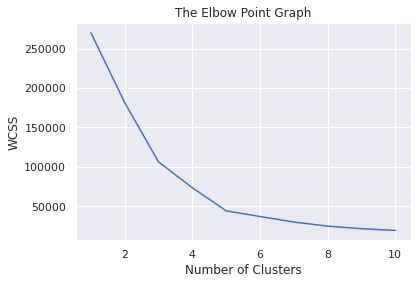

In [23]:
sns.set()
plt.plot(range(1,11),wcss)   #range(x,y)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Hence optimum number of clusters obtained  = 5

## Training the k-Means Clustering Unsupervised Model

In [24]:
k = KMeans(n_clusters=5, init='k-means++', random_state=100)

# return a label for each data point based on their cluster
y = k.fit_predict(x)

print(y)

[1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 2 1 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 0 3 0 2 0 3 0 3 0 2 0 3 0 3 0 3 0 3 0 2 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0]


Since we have 5 Clusters - 0, 1, 2, 3, 4, so the 200 values obtained from x have been put into one of the clusters from 0 to 4

## Visualization of Clusters

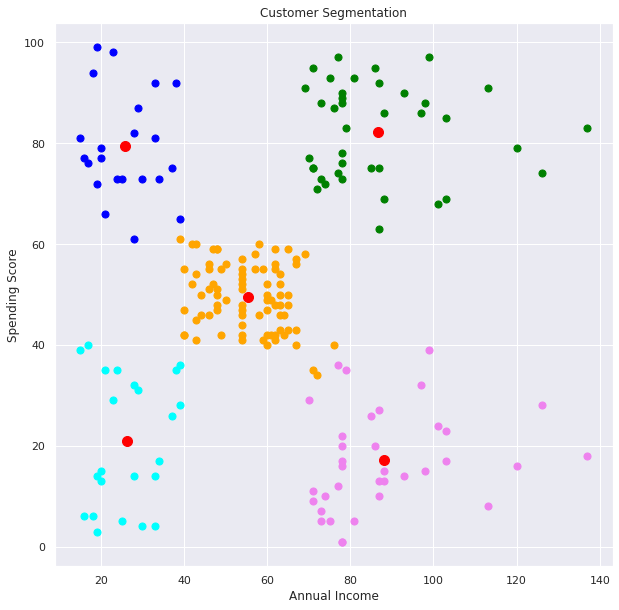

In [25]:
# 0--> Annual Income
# 1--> Spending Score


# plotting all the clusters and their Centroids
plt.figure(figsize=(10,10))    # -->size of graph
plt.scatter(x[y==0,0], x[y==0,1], s=50, c='green', label='Cluster 1')
#           x axis   , y axis
# (x[y=cluster number,annual income], x[y=cluster number, Spending Score])

plt.scatter(x[y==1,0], x[y==1,1], s=50, c='cyan', label='Cluster 2')
plt.scatter(x[y==2,0], x[y==2,1], s=50, c='orange', label='Cluster 3')
plt.scatter(x[y==3,0], x[y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(x[y==4,0], x[y==4,1], s=50, c='blue', label='Cluster 5')

plt.title('Customer Segmentation')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

# plot the centroids
plt.scatter(k.cluster_centers_[:,0], k.cluster_centers_[:,1], s=100, c='red', label='Centroids')
          #(x,y) points of centroids 0-->x-axis, 1-->y-axis